<a href="https://colab.research.google.com/github/Dyuti2005/AIML_Task-1/blob/main/Task1_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset (1).csv to Titanic-Dataset (1) (1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('Titanic-Dataset (1).csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with the most common value (mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.drop(columns=['Cabin'], inplace=True)

print("Missing values after handling:", df.isnull().sum().sum())

Missing values after handling: 0


In [4]:
# Convert Sex: male -> 0, female -> 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-Hot Encoding for Embarked (creates dummy variables)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Drop non-numeric columns that aren't useful for a basic model
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


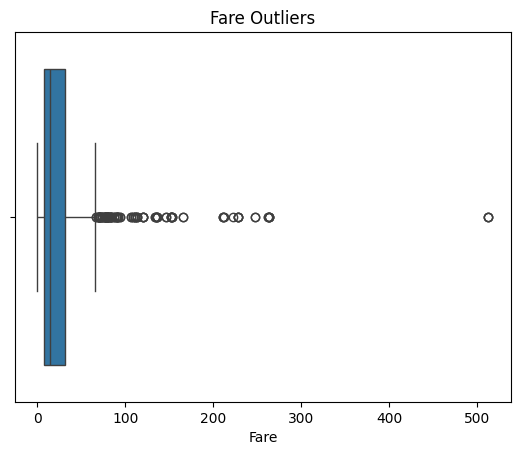

New dataset shape: (708, 9)


In [5]:
# Visualize before removal
sns.boxplot(x=df['Fare'])
plt.title('Fare Outliers')
plt.show()

# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to Fare and Age
df = remove_outliers(df, 'Fare')
df = remove_outliers(df, 'Age')

print(f"New dataset shape: {df.shape}")

In [6]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,-0.637115,1,0,-0.737419,False,True
2,1,3,1,-0.216039,0,0,-0.687065,False,True
3,1,1,1,0.731381,1,0,2.682952,False,True
4,0,3,0,0.731381,0,0,-0.677740,False,True
5,0,3,0,-0.005501,0,0,-0.647281,True,False


In [7]:
# Save to CSV
df.to_csv('cleaned_titanic_colab.csv', index=False)

# Download to your computer
from google.colab import files
files.download('cleaned_titanic_colab.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>